In [64]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate

In [ ]:
def f(x):
    return np.abs(np.sin(x)) - np.abs(np.cos(x))

In [ ]:
def x_cheb_m(m):
    return 0.5 * ((b - a) * np.cos((2*m + 1) / (2*n) * np.pi) + a + b)

In [72]:
a = 0
b = np.pi
n = 6
h = (b - a) / n
x_ = np.linspace(a, b, 100)
y_ = f(x_)

In [58]:
print(f'x = {np.round(x := np.linspace(a, b, n+1), 3)}')
print(f'x intermediate = {np.round(x_interm := np.linspace(a + 0.75*h, b-h*0.25, n), 3)}')
print(f'x chebyshev = {np.round(x_cheb := np.array([x_cheb_m(m) for m in range(n)]), 3)}')
print(f'y = {np.round(y := f(x), 3)}')
print(f'y intermediate = {np.round(y_interm := f(x_interm), 3)}')
print(f'y chebyshev = {np.round(y_cheb := f(x_cheb), 3)}')

x = [0.    0.524 1.047 1.571 2.094 2.618 3.142]
x intermediate = [0.393 0.916 1.44  1.963 2.487 3.011]
x chebyshev = [3.088 2.682 1.977 1.164 0.46  0.054]
y = [-1.    -0.366  0.366  1.     0.366 -0.366 -1.   ]
y intermediate = [-0.541  0.185  0.861  0.541 -0.185 -0.861]
y intermediate = [-0.945 -0.452  0.523  0.523 -0.452 -0.945]


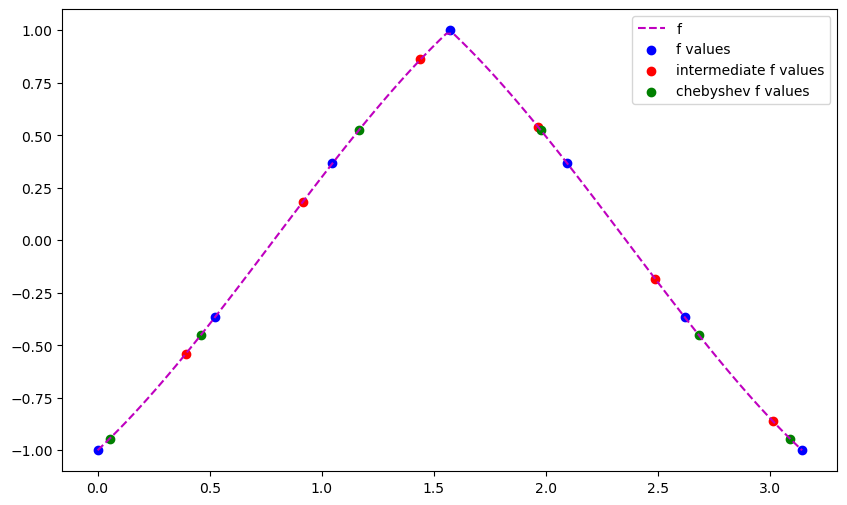

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.scatter(x, y, color='b', label='f values');
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values');
plt.scatter(x_cheb, y_cheb, color='g', label='chebyshev f values');
plt.legend();

In [65]:
cs = interpolate.CubicSpline(x, y)

In [73]:
y_interm_pred = cs(x_interm)
y_interm_pred - y_interm

array([ 0.01721592, -0.02440078,  0.08052975,  0.04540869, -0.01734896,
        0.0238446 ])

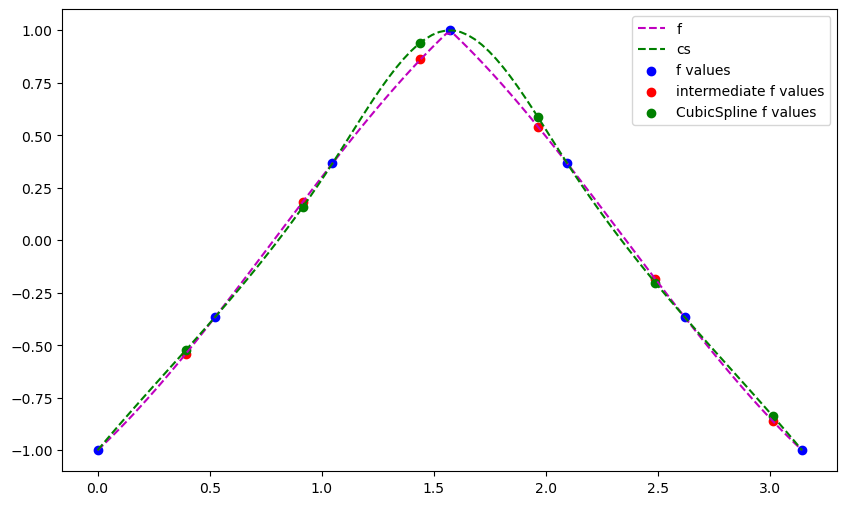

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, cs(x_), '--', color='g', label='cs');
plt.scatter(x, y, color='b', label='f values');
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values');
plt.scatter(x_interm, y_interm_pred, color='g', label='CubicSpline f values');
plt.legend();